<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('adult_csv.csv',na_values=['#NAME?'])

In [2]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1.0,0.0,2.0,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,2.0,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,2.0,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,2.0,Cuba,<=50K


In [3]:
print(df['class'].value_counts())

<=50K    14997
>50K      4691
Name: class, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             19689 non-null  int64  
 1   workclass       18590 non-null  object 
 2   fnlwgt          19689 non-null  int64  
 3   education       19689 non-null  object 
 4   education-num   19689 non-null  int64  
 5   marital-status  19689 non-null  object 
 6   occupation      18587 non-null  object 
 7   relationship    19689 non-null  object 
 8   race            19689 non-null  object 
 9   sex             19688 non-null  object 
 10  capitalgain     19688 non-null  float64
 11  capitalloss     19688 non-null  float64
 12  hoursperweek    19688 non-null  float64
 13  native-country  19335 non-null  object 
 14  class           19688 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 2.3+ MB


In [5]:
import matplotlib.pyplot as plt

In [6]:
df['class']=[0 if x=='<=50K' else 1 for x in df['class']]

X=df.drop('class',1)
y=df['class']

In [7]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1.0,0.0,2.0,United-States
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.0,United-States
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,2.0,United-States
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,2.0,United-States
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,2.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,0,Private,146268,10th,6,Never-married,Other-service,Own-child,White,Female,0.0,0.0,0.0,United-States
19685,2,Private,147258,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,2.0,United-States
19686,1,Self-emp-not-inc,207948,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0.0,0.0,2.0,United-States
19687,3,Private,180607,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,2.0,United-States


In [8]:
X['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [9]:
print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  ...  Masters  Preschool  Prof-school  Some-college
0     0     0     0        0  ...        0          0            0             0
1     0     0     0        0  ...        0          0            0             0
2     0     0     0        0  ...        0          0            0             0
3     0     1     0        0  ...        0          0            0             0
4     0     0     0        0  ...        0          0            0             0

[5 rows x 16 columns]


In [10]:
def unique_col(df):
  for col in df.columns:
      if df[col].dtype=='object':
          unique_cat=df[col].unique()
          unique_cat_len=len(df[col].unique())
          print(f"Feature {col} has {unique_cat_len} unique categories")
          print("----------------------------------------------------------------------------------------")
          print(f"Unique_col_cat of {col} are \n {unique_cat}")


In [11]:
unique_col(X)

Feature workclass has 9 unique categories
----------------------------------------------------------------------------------------
Unique_col_cat of workclass are 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Feature education has 16 unique categories
----------------------------------------------------------------------------------------
Unique_col_cat of education are 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Feature marital-status has 7 unique categories
----------------------------------------------------------------------------------------
Unique_col_cat of marital-status are 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Feature occupation has 15 unique categories
--------------------------------------------

In [12]:
print(X['native-country'].value_counts().sort_values(ascending=False))

United-States                 17620
Mexico                          390
Philippines                     119
Germany                          83
Canada                           81
Puerto-Rico                      79
England                          63
El-Salvador                      61
Cuba                             61
South                            53
India                            51
Jamaica                          49
China                            46
Italy                            43
Vietnam                          42
Dominican-Republic               42
Guatemala                        42
Poland                           41
Japan                            38
Taiwan                           34
Columbia                         32
Iran                             31
Haiti                            27
Portugal                         22
Nicaragua                        21
Ecuador                          19
Greece                           19
Peru                        

In [13]:
X['native-country']=["United-States" if x=="United-States" else "Others" for x in X['native-country']]
X['native-country'].value_counts()

United-States    17620
Others            2069
Name: native-country, dtype: int64

In [14]:
# Create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [15]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df   

In [16]:
X=dummy_df(X,todummy_list)

In [17]:
X.isnull().sum().sort_values(ascending=False).head()

capitalgain                     1
capitalloss                     1
hoursperweek                    1
native-country_United-States    0
education_Doctorate             0
dtype: int64

In [18]:
 from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy='median')
imp.fit(X)

X=pd.DataFrame(data=imp.transform(X),columns=X.columns)



Outlier detection - Tukey IQR

Identifies extreme values in data

Outliers are defined as:

Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

Standard deviation from the mean is another common method to detect extreme 
values

But it can be problematic:

Assumes normality

Sensitive to very extreme values

In [19]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return  outlier_indices,outlier_values

In [20]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[]


Outlier detection - Kernel Density Estimation
Non-parametric way to estimate the probability density function of a given feature
Can be advantageous compared to extreme value detection (e.g. Tukey IQR)
Capures outliers in bimodal distributions

In [ ]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
kde_indices, kde_values = find_outliers_kde(X['age'])
print(np.sort(kde_values))

In [21]:
def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

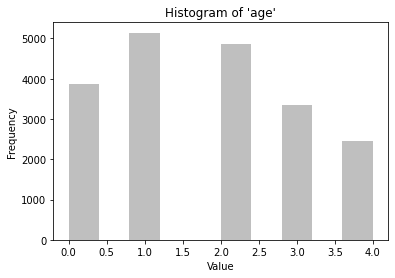

In [24]:
plot_histogram(X['age'])

In [25]:
# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Outcome=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='Outcome=1')
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

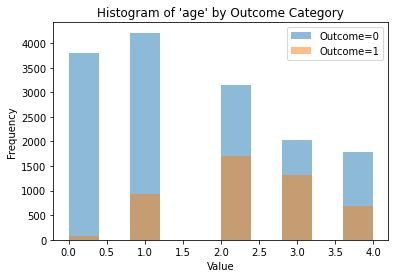

In [27]:
plot_histogram_dv(X['age'],y)

In [29]:
X['age']

0        2.0
1        3.0
2        2.0
3        3.0
4        1.0
        ... 
19684    0.0
19685    2.0
19686    1.0
19687    3.0
19688    4.0
Name: age, Length: 19689, dtype: float64

In [35]:
X[y==0]

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_Wh,race_White,sex_Female,sex_Male,native-country_Others,native-country_United-States
0,2.0,77516.0,13.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,3.0,83311.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.0,215646.0,9.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,3.0,234721.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,338409.0,13.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19683,2.0,260997.0,10.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19684,0.0,146268.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
19685,2.0,147258.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
19686,1.0,207948.0,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [36]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [38]:
X_pca

,0,1,2,3,4,5,6,7,8,9
0,-112213.241102,-2.888630,-0.210384,0.313215,0.259695,0.718444,1.161337,0.046396,-0.104092,0.483591
1,-106418.241104,-2.808407,0.972433,1.335625,-1.940574,-0.500182,0.233774,-0.179316,-0.151311,0.474000
2,25916.758902,1.114725,0.244143,0.105742,0.551829,-0.122830,0.755682,-0.209181,0.806557,-0.090701
3,44991.758904,2.983331,1.590051,-0.260633,-0.408702,-0.247566,-0.056603,-0.140056,-0.229834,-0.429042
4,148679.758899,-3.111442,-0.736764,0.316447,0.213851,-0.157488,-1.354229,-0.163129,-0.131221,-0.532904
...,...,...,...,...,...,...,...,...,...,...
19684,-43461.241093,4.339088,-2.316258,1.248627,-0.816732,0.317723,-0.266213,0.152100,-0.135308,-0.107788
19685,-42471.241095,4.090652,0.742946,-0.820872,-0.613075,-0.183527,-0.042244,-0.112893,-0.181900,-0.337846
19686,18218.758902,0.118990,-0.968302,0.006655,0.315643,-0.094155,0.983822,0.086155,-0.870642,0.597199
19687,-9122.241099,1.160375,0.584572,1.037665,0.880585,0.012386,-0.140750,-0.170709,0.507599,0.048685


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [43]:
# The total number of features have grown substantially after dummying and adding interaction terms
print(df.shape)
print(X.shape)

(19689, 15)
(19689, 67)


In [44]:
X_train.shape,X_test.shape

((13782, 67), (5907, 67))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [46]:
find_model_perf(X_train,y_train,X_test,y_test)

0.4975273536906058

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7728119180633147